# References and ports

gdsfactory defines your component once in memory and can add multiple References (Instances) to the same component.

As you build components you can include references to other components. Adding a reference is like having a pointer to a component.

The GDSII specification allows the use of references, and similarly gdsfactory uses them (with the `add_ref()` function).
what is a reference? Simply put:  **A reference does not contain any geometry. It only *points* to an existing geometry**.

Say you have a ridiculously large polygon with 100 billion vertices that you call BigPolygon. It's huge, and you need to use it in your design 250 times.
Well, a single copy of BigPolygon takes up 1MB of memory, so you don't want to make 250 copies of it
You can instead *references* the polygon 250 times.
Each reference only uses a few bytes of memory -- it only needs to know the memory address of BigPolygon, position, rotation and mirror.
This way, you can keep one copy of BigPolygon and use it again and again.

You can start by making a blank `Component` and add a single polygon to it.

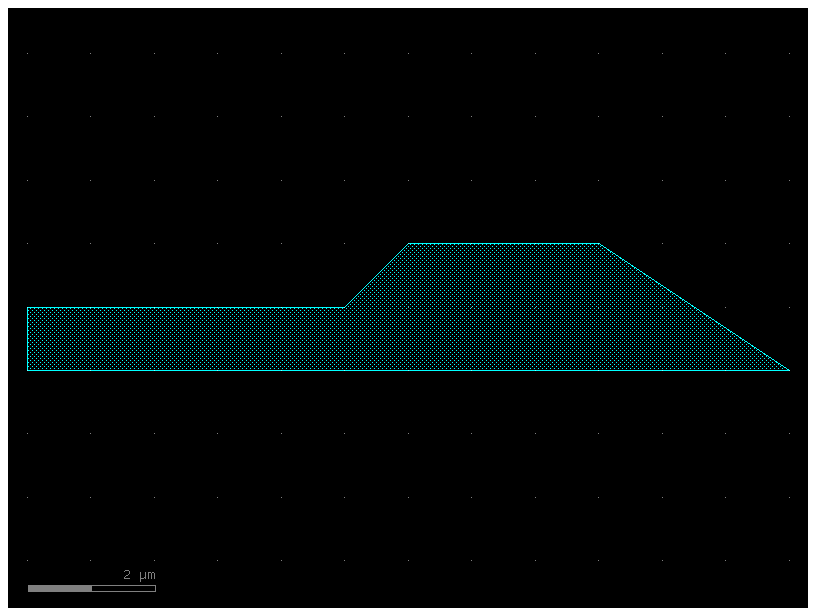

In [1]:
import gdsfactory as gf

# Create a blank Component
p = gf.Component()

# Add a polygon
xpts = [0, 0, 5, 6, 9, 12]
ypts = [0, 1, 1, 2, 2, 0]
p.add_polygon(list(zip(xpts, ypts)), layer=(2, 0))

# plot the Component with the polygon in it
p.plot()

Now, you want to reuse this polygon repeatedly without creating multiple copies of it.

To do so, you need to make a second blank `Component`, this time called `c`.

In this new Component you *reference* our Component `p` which contains our polygon.

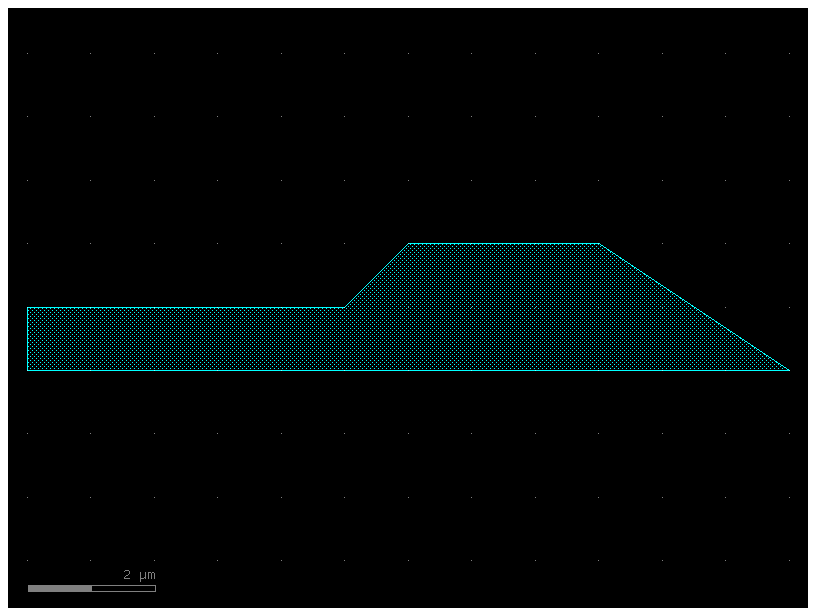

In [2]:
c = gf.Component()  # Create a new blank Component
poly_ref = c.add_ref(p)  # Reference the Component "p" that has the polygon in it
c.plot()

you just made a copy of your polygon -- but remember, you didn't actually
make a second polygon, you just made a reference (aka pointer) to the original
polygon.  Let's add two more references to `c`:

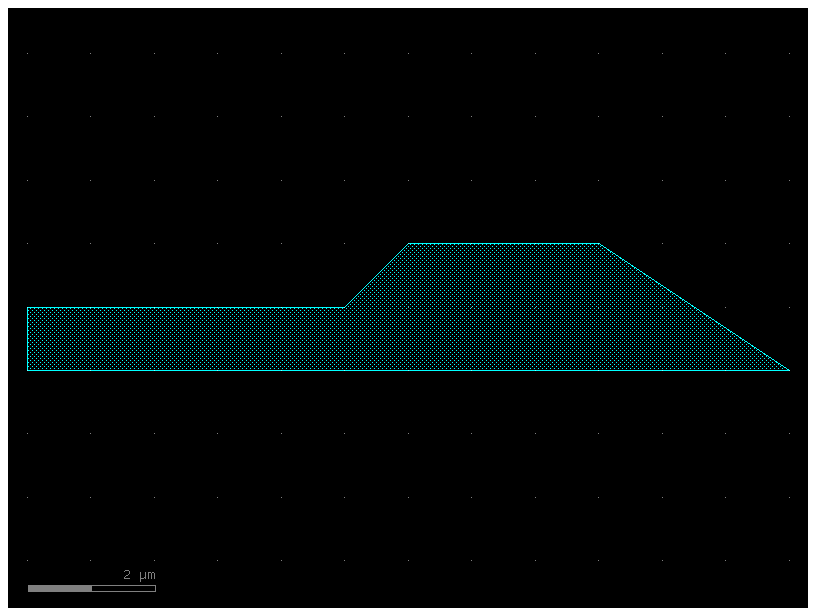

In [3]:
poly_ref2 = c.add_ref(p)  # Reference the Component "p" that has the polygon in it
poly_ref3 = c.add_ref(p)  # Reference the Component "p" that has the polygon in it
c.plot()

Now you have 3x polygons all on top of each other.  Again, this would appear
useless, except that you can manipulate each reference independently. Notice that
when you called `c.add_ref(p)` above, we saved the result to a new variable each
time (`poly_ref`, `poly_ref2`, and `poly_ref3`)?  You can use those variables to
reposition the references.

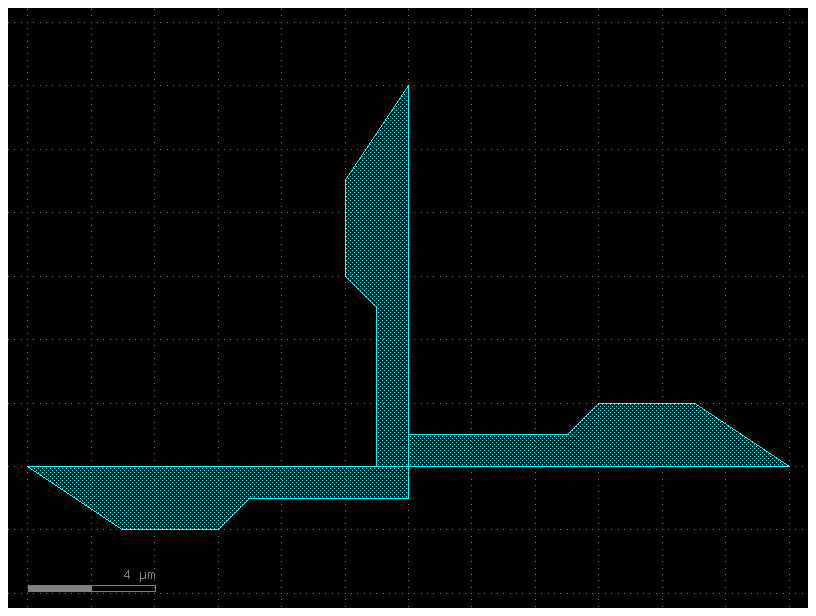

In [4]:
poly_ref2.drotate(90)  # Rotate the 2nd reference we made 90 degrees
poly_ref3.drotate(180)  # Rotate the 3rd reference we made 180 degrees
c.plot()

Now you're getting somewhere! You've only had to make the polygon once, but you're
able to reuse it as many times as you want.

## Modifying the referenced geometry

What happens when you change the original geometry that the reference points to?  In your case, your references in
`c` all point to the Component `p` that with the original polygon.  Let's try
adding a second polygon to `p`.

First you add the second polygon and make sure `P` looks like you expect:

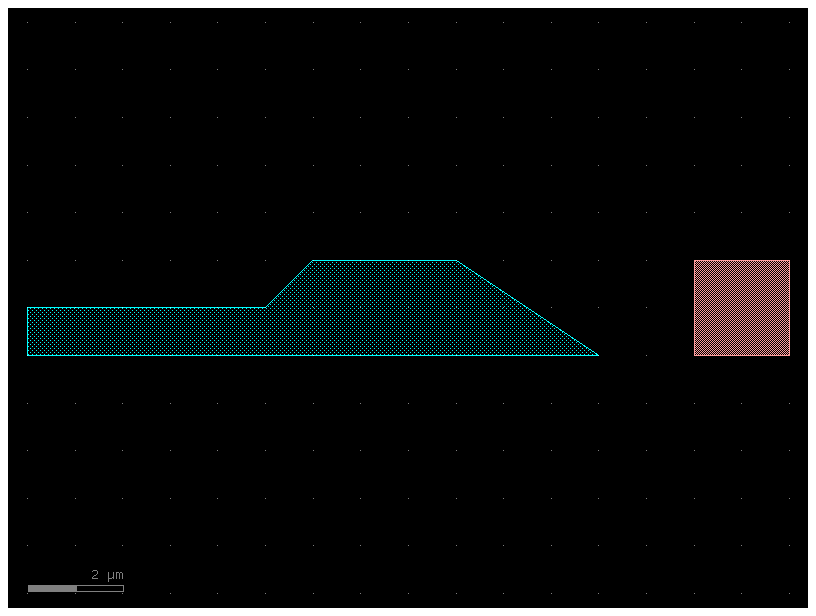

In [5]:
# Add a 2nd polygon to "p"
xpts = [14, 14, 16, 16]
ypts = [0, 2, 2, 0]
p.add_polygon(list(zip(xpts, ypts)), layer=(1, 0))
p

That looks good.  Now let's find out what happened to `c` that contains the
three references.  Keep in mind that you have not modified `c` or executed any
functions/operations on `c` -- all you have done is modify `p`.

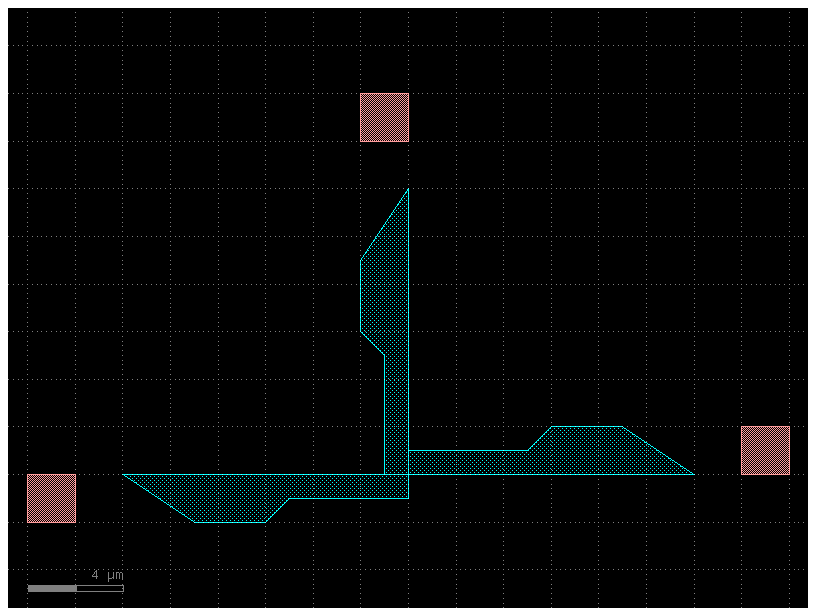

In [6]:
c.plot()

 **When you modify the original geometry, all of the
references automatically reflect the modifications.**  This is very powerful,
because you can use this to make very complicated designs from relatively simple
elements in a computation- and memory-efficient way.

Let's try making references a level deeper by referencing `c`.  Note here we use
the `<<` operator to add the references -- this is just shorthand, and is
exactly equivalent to using `add_ref()`

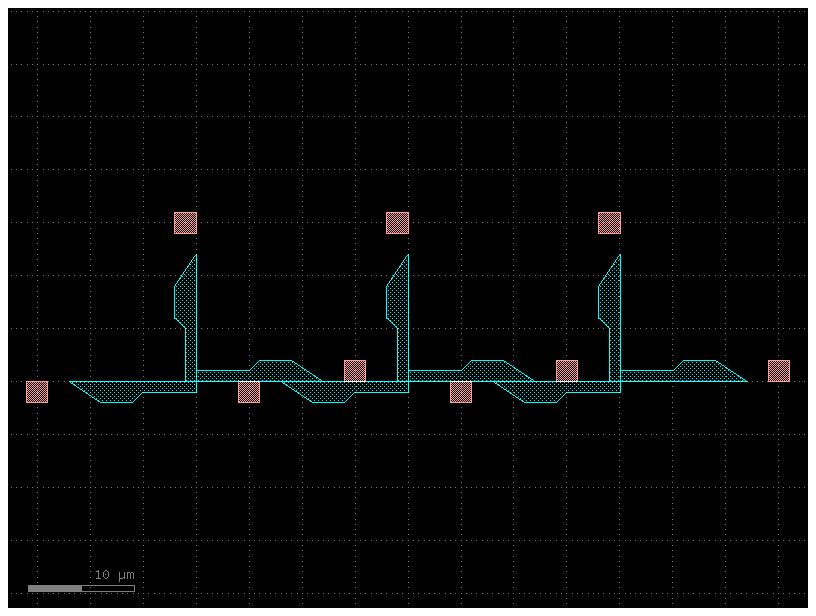

In [7]:
c2 = gf.Component()  # Create a new blank Component
d_ref1 = c2.add_ref(c)  # Reference the Component "c" that 3 references in it
d_ref2 = c2 << c  # Use the "<<" operator to create a 2nd reference to c.plot()
d_ref3 = c2 << c  # Use the "<<" operator to create a 3rd reference to c.plot()

d_ref1.dmove([20, 0])
d_ref2.dmove([40, 0])

c2

As you've seen you have two ways to add a reference to our component:

1. create the reference and add it to the component

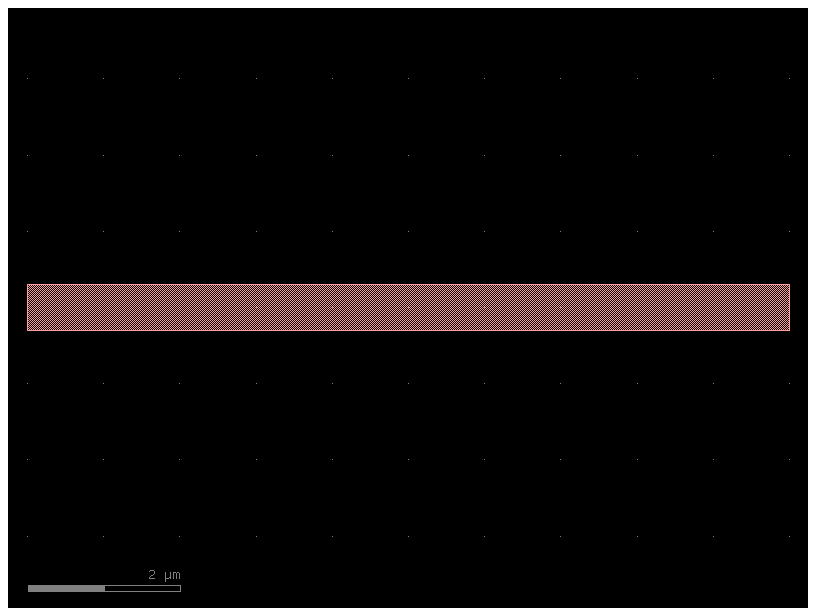

In [10]:
c = gf.Component()
wr = c.add_ref(gf.components.straight(width=0.6))
c.plot()

2. or do it in a single line

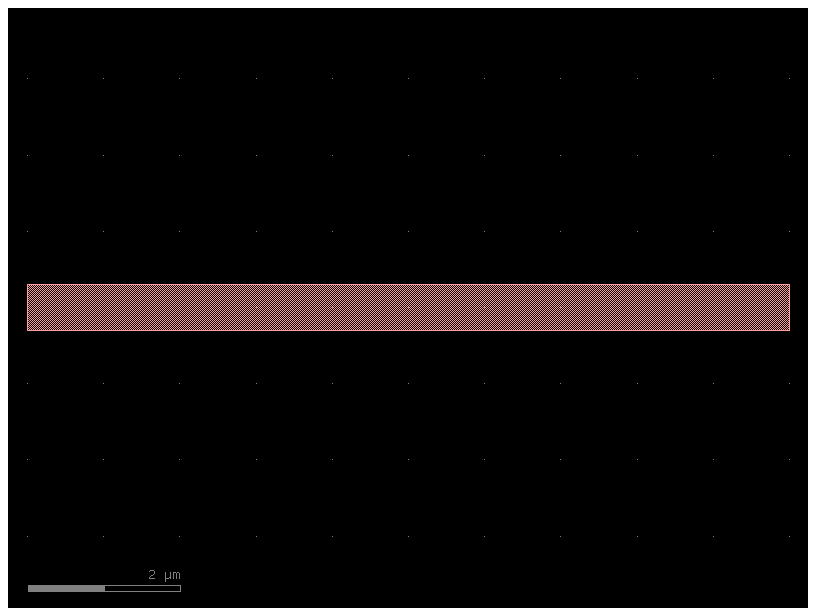

In [11]:
c = gf.Component()
wr = c << gf.components.straight(width=0.6)
c.plot()

in both cases you can move the reference `wr` after created

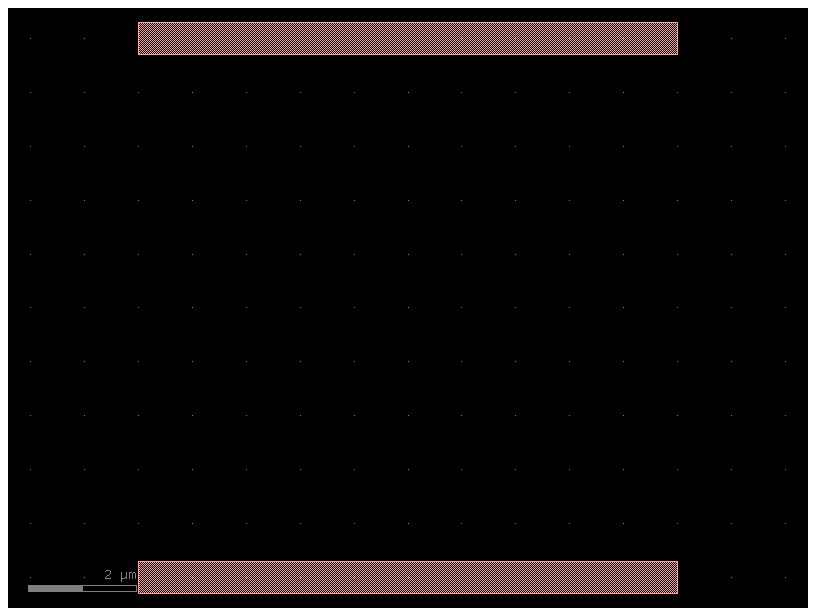

In [14]:
c = gf.Component()
wr1 = c << gf.components.straight(width=0.6)
wr2 = c << gf.components.straight(width=0.6)
wr2.dmovey(10)
c.add_ports(wr1.ports, prefix="bot_")
c.add_ports(wr2.ports, prefix="top_")
c.plot()

In [13]:
c.pprint_ports()

┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name   ┃ width ┃ orientation ┃ layer ┃ center       ┃ port_type ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ bot_o1 │ 0.6   │ 180.0       │ WG    │ (0.0, 0.0)   │ optical   │
│ bot_o2 │ 0.6   │ 0.0         │ WG    │ (10.0, 0.0)  │ optical   │
│ top_o1 │ 0.6   │ 180.0       │ WG    │ (0.0, 10.0)  │ optical   │
│ top_o2 │ 0.6   │ 0.0         │ WG    │ (10.0, 10.0) │ optical   │
└────────┴───────┴─────────────┴───────┴──────────────┴───────────┘

You can also auto_rename ports using gdsfactory default convention, where ports are numbered clockwise starting from the bottom left

In [15]:
c.auto_rename_ports()

In [16]:
c.pprint_ports()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center       ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 0.6   │ 180.0       │ WG    │ (0.0, 0.0)   │ optical   │
│ o4   │ 0.6   │ 0.0         │ WG    │ (10.0, 0.0)  │ optical   │
│ o2   │ 0.6   │ 180.0       │ WG    │ (0.0, 10.0)  │ optical   │
│ o3   │ 0.6   │ 0.0         │ WG    │ (10.0, 10.0) │ optical   │
└──────┴───────┴─────────────┴───────┴──────────────┴───────────┘

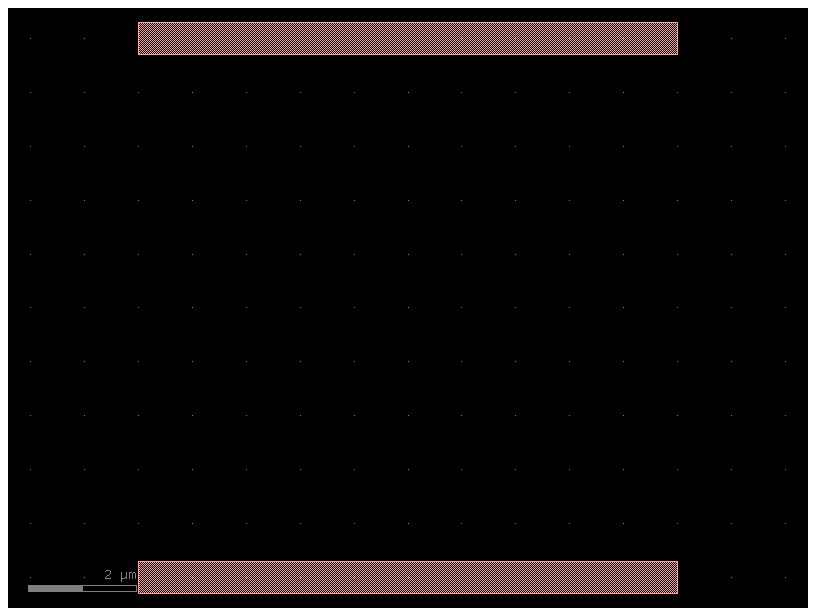

In [17]:
c.plot()

## Arrays of references

In GDS, there's a type of structure called a "ComponentReference" which takes a cell and repeats it NxM times on a fixed grid spacing. For convenience, `Component` includes this functionality with the add_ref() function.
Note that CellArrays are not compatible with ports (since there is no way to access/modify individual elements in a GDS cellarray)

gdsfactory also provides with more flexible arrangement options if desired, see for example `grid()` and `packer()`.

As well as `gf.components.array`

Let's make a new Component and put a big array of our Component `c` in it:

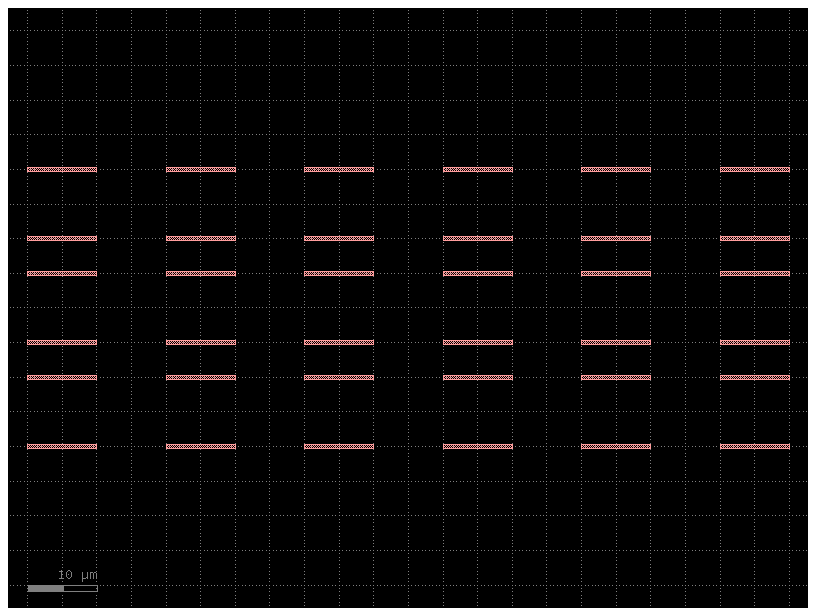

In [39]:
c3 = gf.Component()  # Create a new blank Component
aref = c3.add_ref(
    c, columns=6, rows=3, spacing=[20, 15]
)  # Reference the Component "c" 3 references in it with a 3 rows, 6 columns array
c3.plot()

CellArrays don't have ports and there is no way to access/modify individual elements in a GDS cellarray.

gdsfactory provides you with similar functions in `gf.components.array` and `gf.components.array_2d`

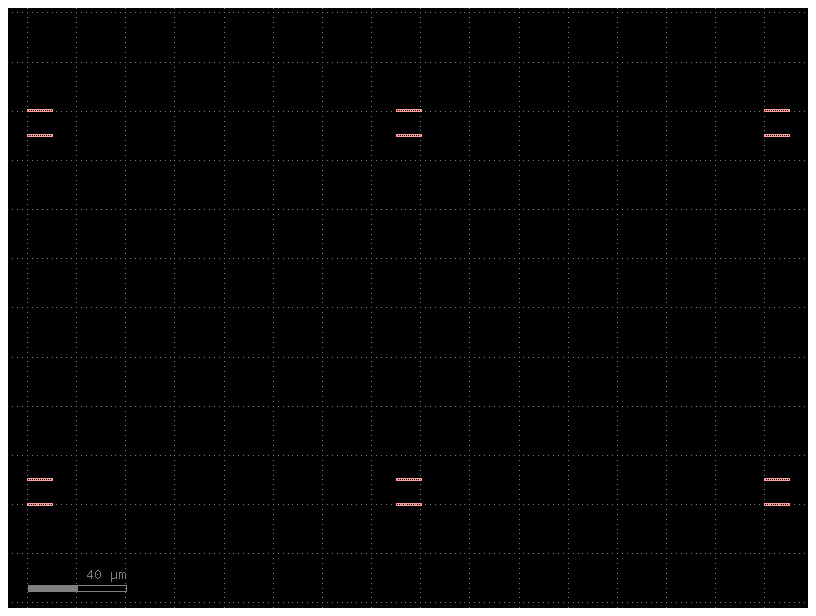

In [40]:
c4 = gf.Component("demo_array")  # Create a new blank Component
aref = c4 << gf.components.array(component=c, columns=3, rows=2)
c4.add_ports(aref.ports)
c4

In [41]:
c4.pprint_ports()

┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name   ┃ width ┃ orientation ┃ layer ┃ center         ┃ port_type ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1_1_1 │ 0.6   │ 180.0       │ WG    │ (0.0, 0.0)     │ optical   │
│ o4_1_1 │ 0.6   │ 0.0         │ WG    │ (10.0, 0.0)    │ optical   │
│ o2_1_1 │ 0.6   │ 180.0       │ WG    │ (0.0, 10.0)    │ optical   │
│ o3_1_1 │ 0.6   │ 0.0         │ WG    │ (10.0, 10.0)   │ optical   │
│ o1_2_1 │ 0.6   │ 180.0       │ WG    │ (0.0, 150.0)   │ optical   │
│ o4_2_1 │ 0.6   │ 0.0         │ WG    │ (10.0, 150.0)  │ optical   │
│ o2_2_1 │ 0.6   │ 180.0       │ WG    │ (0.0, 160.0)   │ optical   │
│ o3_2_1 │ 0.6   │ 0.0         │ WG    │ (10.0, 160.0)  │ optical   │
│ o1_1_2 │ 0.6   │ 180.0       │ WG    │ (150.0, 0.0)   │ optical   │
│ o4_1_2 │ 0.6   │ 0.0         │ WG    │ (160.0, 0.0)   │ optical   │
│ o2_1_2 │ 0.6   │ 180.0       │ WG    │ (150.0, 10.0)  │ optical   │
│ o3_1_2 │ 0.6   │ 0.0         │ WG    │ (160.0, 10.0)  │ optical   │
│ o1_2_2 │ 0.6   │ 180.0       │ WG    │ (150.0, 150.0) │ optical   │
│ o4_2_2 │ 0.6   │ 0.0         │ WG    │ (160.0, 150.0) │ optical   │
│ o2_2_2 │ 0.6   │ 180.0       │ WG    │ (150.0, 160.0) │ optical   │
│ o3_2_2 │ 0.6   │ 0.0         │ WG    │ (160.0, 160.0) │ optical   │
│ o1_1_3 │ 0.6   │ 180.0       │ WG    │ (300.0, 0.0)   │ optical   │
│ o4_1_3 │ 0.6   │ 0.0         │ WG    │ (310.0, 0.0)   │ optical   │
│ o2_1_3 │ 0.6   │ 180.0       │ WG    │ (300.0, 10.0)  │ optical   │
│ o3_1_3 │ 0.6   │ 0.0         │ WG    │ (310.0, 10.0)  │ optical   │
│ o1_2_3 │ 0.6   │ 180.0       │ WG    │ (300.0, 150.0) │ optical   │
│ o4_2_3 │ 0.6   │ 0.0         │ WG    │ (310.0, 150.0) │ optical   │
│ o2_2_3 │ 0.6   │ 180.0       │ WG    │ (300.0, 160.0) │ optical   │
│ o3_2_3 │ 0.6   │ 0.0         │ WG    │ (310.0, 160.0) │ optical   │
└────────┴───────┴─────────────┴───────┴────────────────┴───────────┘

In [42]:
help(gf.components.array)

Help on function array in module gdsfactory.components.array_component:

array(component: 'ComponentSpec' = 'pad', spacing: 'tuple[float, float]' = (150.0, 150.0), columns: 'int' = 6, rows: 'int' = 1, add_ports: 'bool' = True, size: 'Float2 | None' = None, centered: 'bool' = False) -> 'Component'
    Returns an array of components.
    
    Args:
        component: to replicate.
        spacing: x, y spacing.
        columns: in x.
        rows: in y.
        add_ports: add ports from component into the array.
        size: Optional x, y size. Overrides columns and rows.
        centered: center the array around the origin.
    
    Raises:
        ValueError: If columns > 1 and spacing[0] = 0.
        ValueError: If rows > 1 and spacing[1] = 0.
    
    .. code::
    
        2 rows x 4 columns
         ___        ___       ___          ___
        |   |      |   |     |   |        |   |
        |___|      |___|     |___|        |___|
    
         ___        ___       ___          __

You can also create an array of references for periodic structures. Let's create a [Distributed Bragg Reflector](https://picwriter.readthedocs.io/en/latest/components/dbr.html)


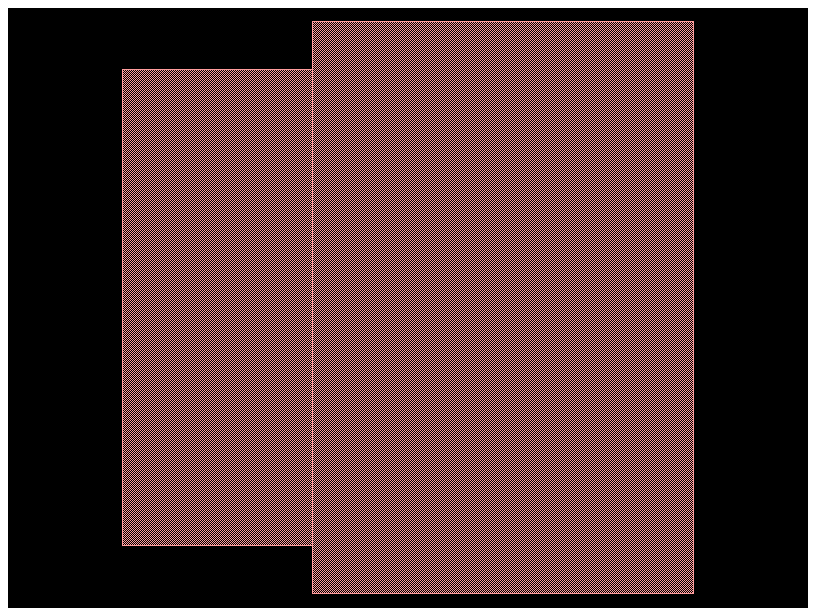

In [43]:
@gf.cell
def dbr_period(w1=0.5, w2=0.6, l1=0.2, l2=0.4, straight=gf.components.straight):
    """Return one DBR period."""
    c = gf.Component()
    r1 = c << straight(length=l1, width=w1)
    r2 = c << straight(length=l2, width=w2)
    r2.connect(port="o1", other=r1.ports["o2"], allow_width_mismatch=True)
    c.add_port("o1", port=r1.ports["o1"])
    c.add_port("o2", port=r2.ports["o2"])
    return c


l1 = 0.2
l2 = 0.4
n = 3
period = dbr_period(l1=l1, l2=l2)
period

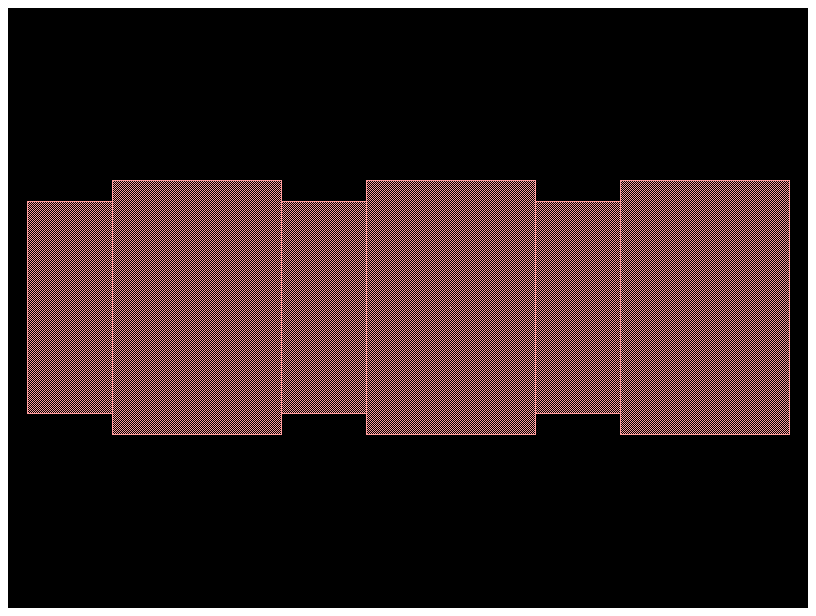

In [44]:
dbr = gf.Component("DBR")
dbr.add_ref(period, columns=n, rows=1, spacing=(l1 + l2, 100))
dbr

Finally we need to add ports to the new component

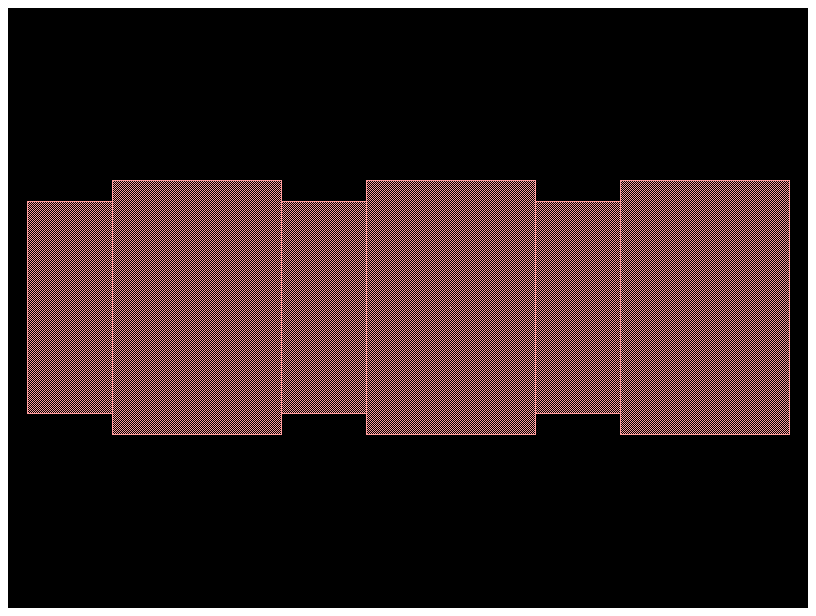

In [45]:
p0 = dbr.add_port("o1", port=period.ports["o1"])
p1 = dbr.add_port("o2", port=period.ports["o2"])

p1.dcenter = [(l1 + l2) * n, 0]
dbr

## Connect references

We have seen that once you create a reference you can manipulate the reference to move it to a location. Here we are going to connect that reference to a port. Remember that we follow that a certain reference `source` connects to a `destination` port

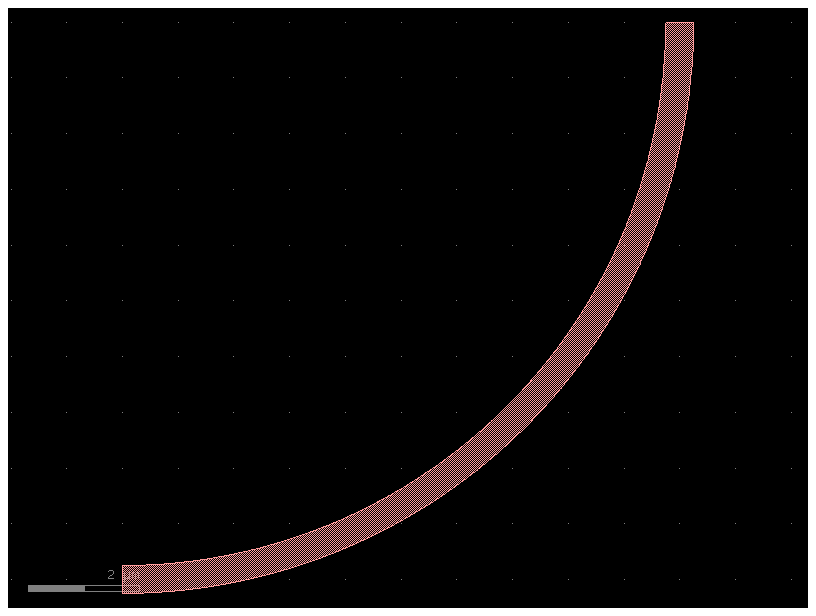

In [46]:
bend = gf.components.bend_circular()
bend

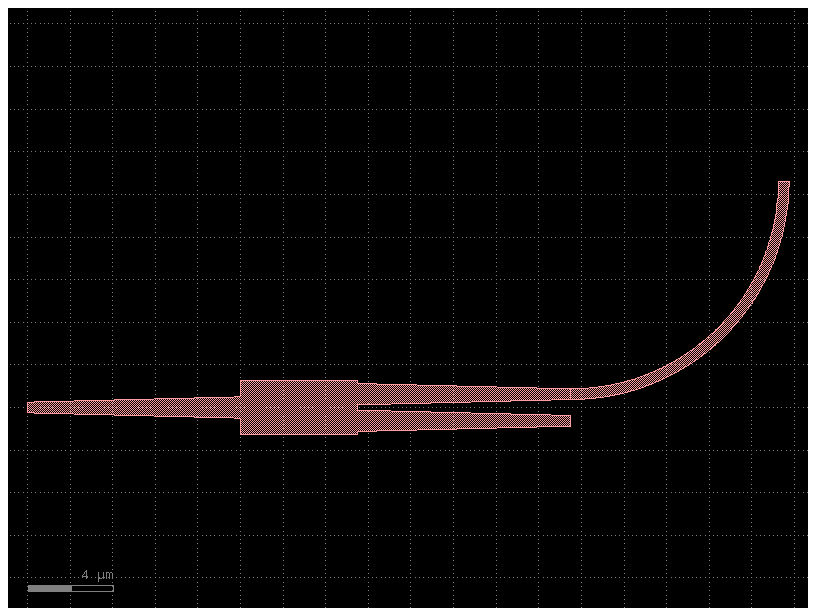

In [47]:
c = gf.Component("sample_reference_connect")

mmi = c << gf.components.mmi1x2()
b = c << gf.components.bend_circular()
b.connect("o1", other=mmi.ports["o2"])

c.add_port("o1", port=mmi.ports["o1"])
c.add_port("o2", port=b.ports["o2"])
c.add_port("o3", port=mmi.ports["o3"])
c.plot()

You can also access the ports as `reference[port_name]` instead of `reference.ports[port_name]`

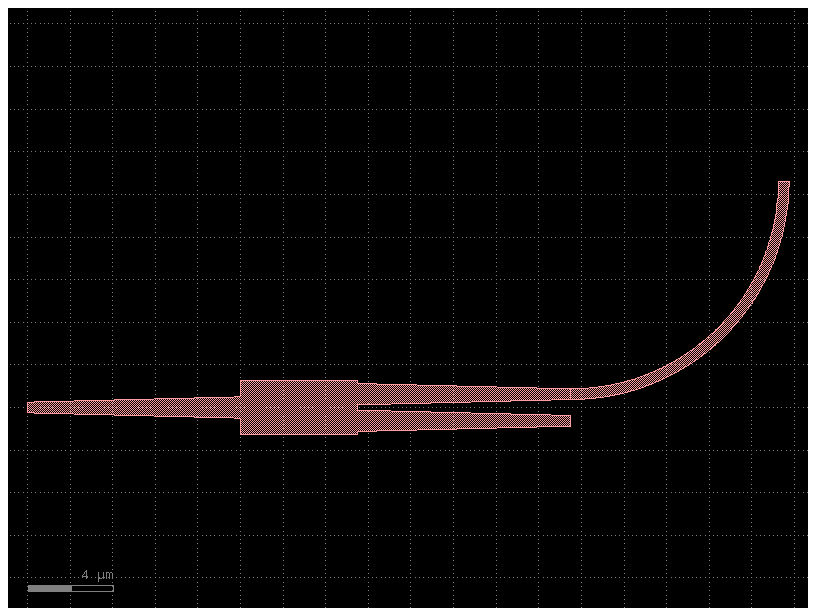

In [48]:
c = gf.Component("sample_reference_connect_simpler")

mmi = c << gf.components.mmi1x2()
b = c << gf.components.bend_circular()
b.connect("o1", other=mmi["o2"])

c.add_port("o1", port=mmi["o1"])
c.add_port("o2", port=b["o2"])
c.add_port("o3", port=mmi["o3"])
c.plot()

Notice that `connect` mates two ports together and does not imply that ports will remain connected.


## Port

You can name the ports as you want and use `gf.port.auto_rename_ports(prefix='o')` to rename them later on.

Here is the default naming convention.

Ports are numbered clock-wise starting from the bottom left corner.

Optical ports have `o` prefix and Electrical ports `e` prefix.

The port naming comes in most cases from the `gdsfactory.cross_section`. For example:

- `gdsfactory.cross_section.strip`  has ports `o1` for input and `o2` for output.
- `gdsfactory.cross_section.metal1` has ports `e1` for input and `e2` for output.

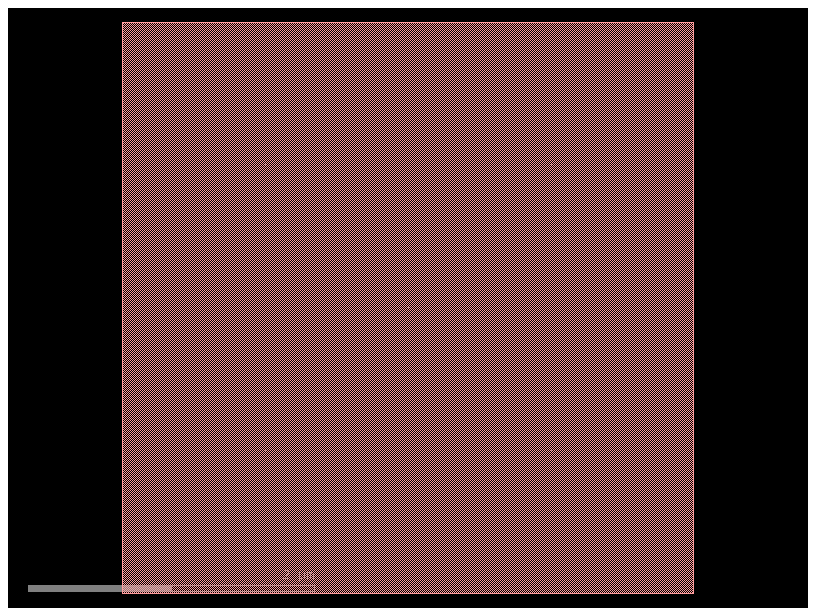

In [49]:
size = 4
c = gf.components.nxn(west=2, south=2, north=2, east=2, xsize=size, ysize=size)
c.plot()

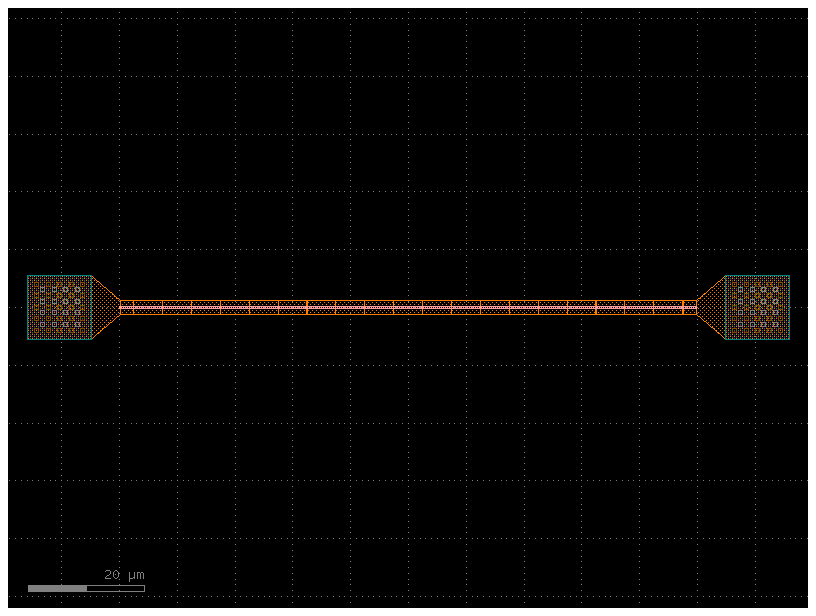

In [53]:
c = gf.components.straight_heater_metal(length=100)
c.plot()

In [54]:
c.ports

['Port(name: o1, dwidth: 0.5, trans: r180 *1 0,0, layer: WG, port_type: optical)', 'Port(name: o2, dwidth: 0.5, trans: r0 *1 100,0, layer: WG, port_type: optical)', 'Port(name: l_e1, dwidth: 11.0, trans: r180 *1 -15.9,0, layer: M3, port_type: electrical)', 'Port(name: l_e2, dwidth: 11.0, trans: r90 *1 -10.4,5.5, layer: M3, port_type: electrical)', 'Port(name: l_e3, dwidth: 11.0, trans: r0 *1 -4.9,0, layer: M3, port_type: electrical)', 'Port(name: l_e4, dwidth: 11.0, trans: r270 *1 -10.4,-5.5, layer: M3, port_type: electrical)', 'Port(name: r_e1, dwidth: 11.0, trans: r180 *1 104.9,0, layer: M3, port_type: electrical)', 'Port(name: r_e2, dwidth: 11.0, trans: r90 *1 110.4,5.5, layer: M3, port_type: electrical)', 'Port(name: r_e3, dwidth: 11.0, trans: r0 *1 115.9,0, layer: M3, port_type: electrical)', 'Port(name: r_e4, dwidth: 11.0, trans: r270 *1 110.4,-5.5, layer: M3, port_type: electrical)']

You can get the optical ports by `layer`

In [55]:
c.get_ports_list(layer=(1, 0))

[Port(name: o1, dwidth: 0.5, trans: r180 *1 0,0, layer: WG, port_type: optical),
 Port(name: o2, dwidth: 0.5, trans: r0 *1 100,0, layer: WG, port_type: optical)]

In [56]:
c.pprint_ports(layer=(1, 0))

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center       ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 0.5   │ 180.0       │ WG    │ (0.0, 0.0)   │ optical   │
│ o2   │ 0.5   │ 0.0         │ WG    │ (100.0, 0.0) │ optical   │
└──────┴───────┴─────────────┴───────┴──────────────┴───────────┘

or by `width`

In [57]:
c.get_ports_list(width=500)

[Port(name: o1, dwidth: 0.5, trans: r180 *1 0,0, layer: WG, port_type: optical),
 Port(name: o2, dwidth: 0.5, trans: r0 *1 100,0, layer: WG, port_type: optical)]

In [58]:
c0 = gf.components.straight_heater_metal()
c0.ports

['Port(name: o1, dwidth: 0.5, trans: r180 *1 0,0, layer: WG, port_type: optical)', 'Port(name: o2, dwidth: 0.5, trans: r0 *1 320,0, layer: WG, port_type: optical)', 'Port(name: l_e1, dwidth: 11.0, trans: r180 *1 -15.9,0, layer: M3, port_type: electrical)', 'Port(name: l_e2, dwidth: 11.0, trans: r90 *1 -10.4,5.5, layer: M3, port_type: electrical)', 'Port(name: l_e3, dwidth: 11.0, trans: r0 *1 -4.9,0, layer: M3, port_type: electrical)', 'Port(name: l_e4, dwidth: 11.0, trans: r270 *1 -10.4,-5.5, layer: M3, port_type: electrical)', 'Port(name: r_e1, dwidth: 11.0, trans: r180 *1 324.9,0, layer: M3, port_type: electrical)', 'Port(name: r_e2, dwidth: 11.0, trans: r90 *1 330.4,5.5, layer: M3, port_type: electrical)', 'Port(name: r_e3, dwidth: 11.0, trans: r0 *1 335.9,0, layer: M3, port_type: electrical)', 'Port(name: r_e4, dwidth: 11.0, trans: r270 *1 330.4,-5.5, layer: M3, port_type: electrical)']

In [59]:
c2 = c0.dup()
c2.auto_rename_ports()
c2.ports

['Port(name: o1, dwidth: 0.5, trans: r180 *1 0,0, layer: WG, port_type: optical)', 'Port(name: o2, dwidth: 0.5, trans: r0 *1 320,0, layer: WG, port_type: optical)', 'Port(name: e1, dwidth: 11.0, trans: r180 *1 -15.9,0, layer: M3, port_type: electrical)', 'Port(name: e3, dwidth: 11.0, trans: r90 *1 -10.4,5.5, layer: M3, port_type: electrical)', 'Port(name: e6, dwidth: 11.0, trans: r0 *1 -4.9,0, layer: M3, port_type: electrical)', 'Port(name: e8, dwidth: 11.0, trans: r270 *1 -10.4,-5.5, layer: M3, port_type: electrical)', 'Port(name: e2, dwidth: 11.0, trans: r180 *1 324.9,0, layer: M3, port_type: electrical)', 'Port(name: e4, dwidth: 11.0, trans: r90 *1 330.4,5.5, layer: M3, port_type: electrical)', 'Port(name: e5, dwidth: 11.0, trans: r0 *1 335.9,0, layer: M3, port_type: electrical)', 'Port(name: e7, dwidth: 11.0, trans: r270 *1 330.4,-5.5, layer: M3, port_type: electrical)']

You can also rename them with a different port naming convention

- prefix: add `e` for electrical `o` for optical
- clockwise
- counter-clockwise
- orientation `E` East, `W` West, `N` North, `S` South


Here is the default one we use (clockwise starting from bottom left west facing port)

```
             3   4
             |___|_
         2 -|      |- 5
            |      |
         1 -|______|- 6
             |   |
             8   7

```

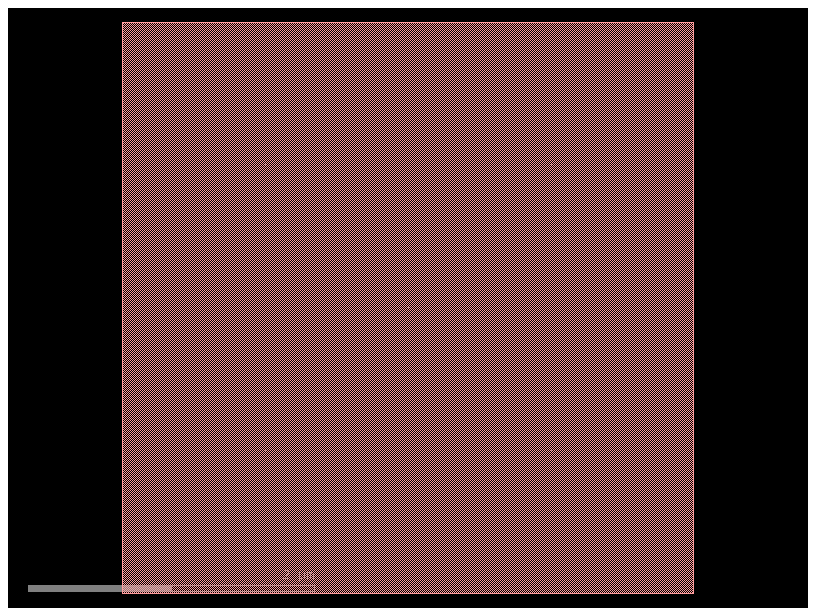

In [60]:
c = gf.Component("demo_ports")
nxn = gf.components.nxn(west=2, north=2, east=2, south=2, xsize=4, ysize=4)
ref = c.add_ref(nxn)
c.add_ports(ref.ports)
c.plot()

In [61]:
ref.ports

['Port(name: o1, dwidth: 0.5, trans: r180 *1 0,1.25, layer: WG, port_type: optical)', 'Port(name: o2, dwidth: 0.5, trans: r180 *1 0,2.75, layer: WG, port_type: optical)', 'Port(name: o6, dwidth: 0.5, trans: r0 *1 4,1.25, layer: WG, port_type: optical)', 'Port(name: o5, dwidth: 0.5, trans: r0 *1 4,2.75, layer: WG, port_type: optical)', 'Port(name: o3, dwidth: 0.5, trans: r90 *1 1.25,4, layer: WG, port_type: optical)', 'Port(name: o4, dwidth: 0.5, trans: r90 *1 2.75,4, layer: WG, port_type: optical)', 'Port(name: o8, dwidth: 0.5, trans: r270 *1 1.25,0, layer: WG, port_type: optical)', 'Port(name: o7, dwidth: 0.5, trans: r270 *1 2.75,0, layer: WG, port_type: optical)']

You can also get the ports counter-clockwise

```
             4   3
             |___|_
         5 -|      |- 2
            |      |
         6 -|______|- 1
             |   |
             7   8

```

In [62]:
c.get_ports_list(clockwise=False)

['Port(name: o1, dwidth: 0.5, trans: r180 *1 0,1.25, layer: WG, port_type: optical)', 'Port(name: o2, dwidth: 0.5, trans: r180 *1 0,2.75, layer: WG, port_type: optical)', 'Port(name: o6, dwidth: 0.5, trans: r0 *1 4,1.25, layer: WG, port_type: optical)', 'Port(name: o5, dwidth: 0.5, trans: r0 *1 4,2.75, layer: WG, port_type: optical)', 'Port(name: o3, dwidth: 0.5, trans: r90 *1 1.25,4, layer: WG, port_type: optical)', 'Port(name: o4, dwidth: 0.5, trans: r90 *1 2.75,4, layer: WG, port_type: optical)', 'Port(name: o8, dwidth: 0.5, trans: r270 *1 1.25,0, layer: WG, port_type: optical)', 'Port(name: o7, dwidth: 0.5, trans: r270 *1 2.75,0, layer: WG, port_type: optical)']

Lets extend the East facing ports (orientation = 0 deg)

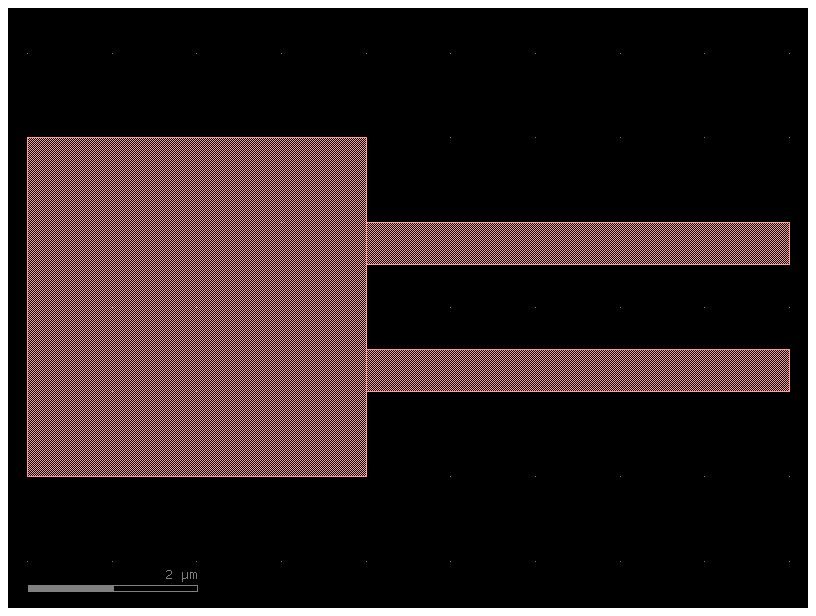

In [63]:
import gdsfactory as gf

cross_section = gf.cross_section.strip()

nxn = gf.components.nxn(
    west=2, north=2, east=2, south=2, xsize=4, ysize=4, cross_section=cross_section
)
c = gf.components.extension.extend_ports(component=nxn, orientation=0)
c.plot()

In [64]:
c.pprint_ports()

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center      ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 0.5   │ 180.0       │ WG    │ (0.0, 1.25) │ optical   │
│ o2   │ 0.5   │ 180.0       │ WG    │ (0.0, 2.75) │ optical   │
│ o6   │ 0.5   │ 0.0         │ 1     │ (9.0, 1.25) │ optical   │
│ o5   │ 0.5   │ 0.0         │ 1     │ (9.0, 2.75) │ optical   │
│ o3   │ 0.5   │ 90.0        │ WG    │ (1.25, 4.0) │ optical   │
│ o4   │ 0.5   │ 90.0        │ WG    │ (2.75, 4.0) │ optical   │
│ o8   │ 0.5   │ 270.0       │ WG    │ (1.25, 0.0) │ optical   │
│ o7   │ 0.5   │ 270.0       │ WG    │ (2.75, 0.0) │ optical   │
└──────┴───────┴─────────────┴───────┴─────────────┴───────────┘

## Port markers (Pins)

You can add pins (port markers) to each port. Different foundries do this differently, so gdsfactory supports all of them.

- square with port inside the component.
- square centered (half inside, half outside component).
- triangular pointing towards the outside of the port.
- path (SiEPIC).



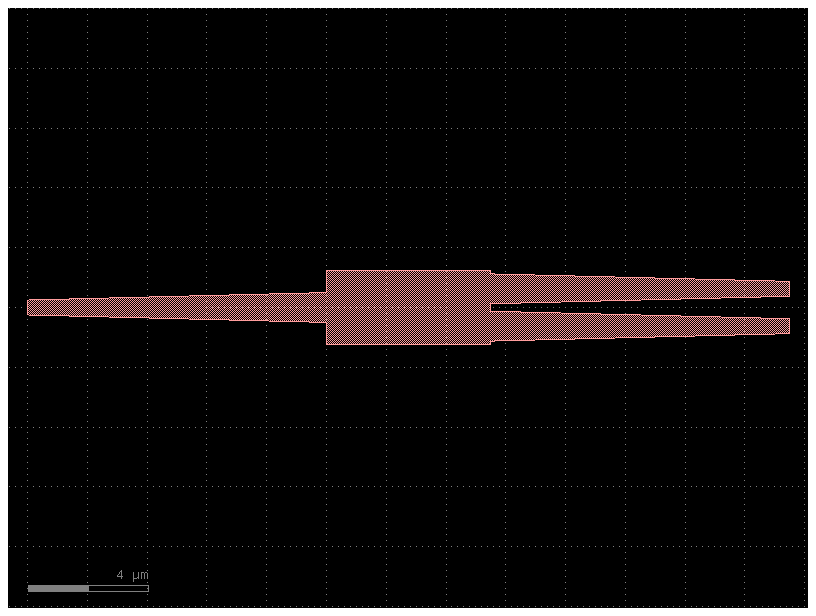

In [65]:
c = gf.components.mmi1x2()
c.plot()

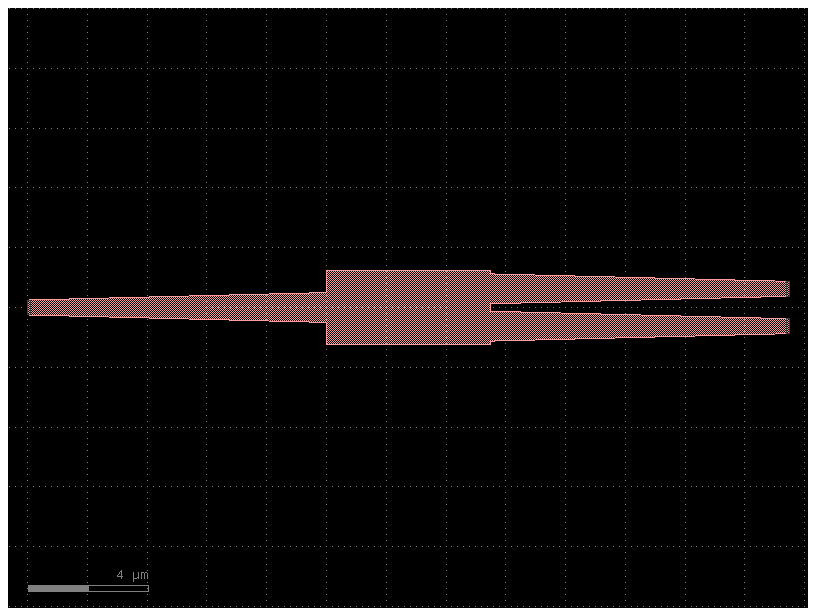

In [66]:
c = gf.components.mmi1x2()
c_with_pins = gf.add_pins.add_pins_container(c)
c_with_pins.plot()

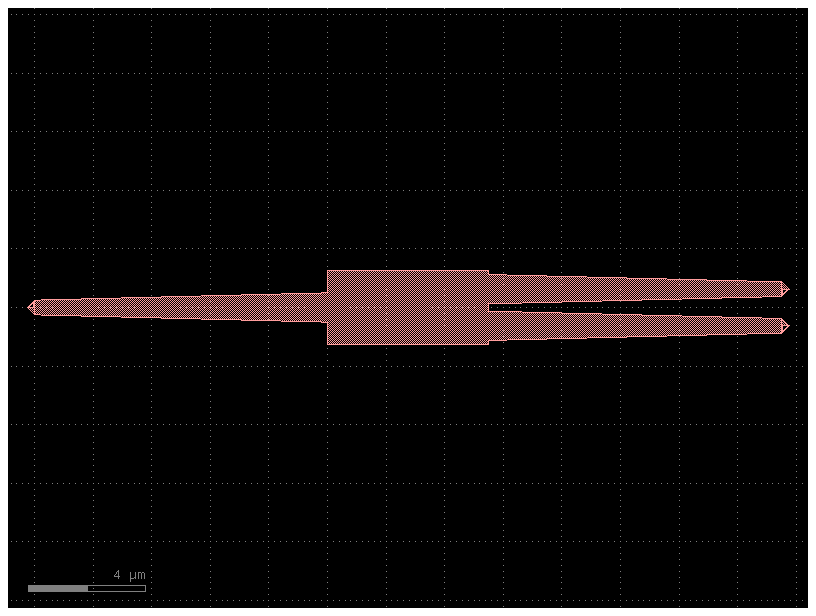

In [67]:
c = gf.components.mmi1x2()
c.draw_ports()
c.plot()

## Component_sequence

When you have repetitive connections you can describe the connectivity as an ASCII map

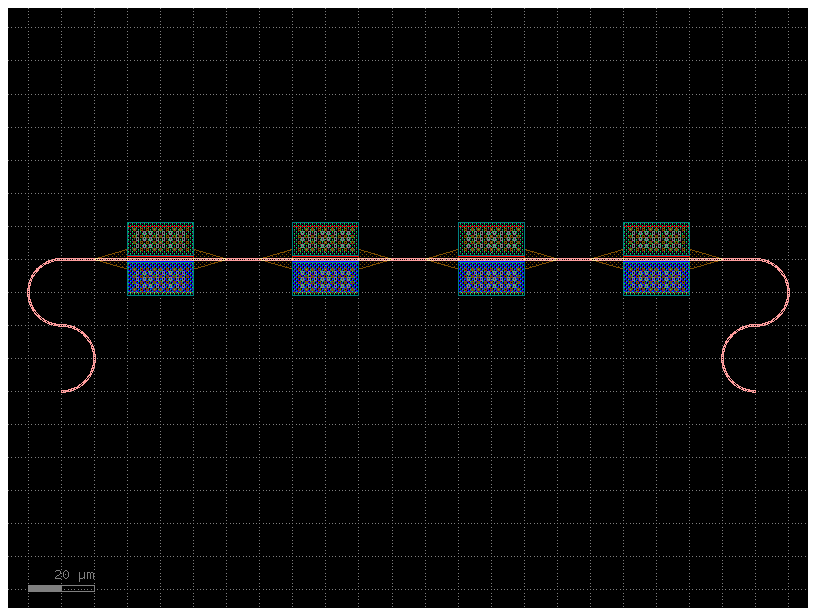

In [68]:
import gdsfactory as gf

bend180 = gf.components.bend_circular180()
wg_pin = gf.components.straight_pin(length=40)
wg = gf.components.straight()

# Define a map between symbols and (component, input port, output port)
symbol_to_component = {
    "D": (bend180, "o1", "o2"),
    "C": (bend180, "o2", "o1"),
    "P": (wg_pin, "o1", "o2"),
    "-": (wg, "o1", "o2"),
}

# Generate a sequence
# This is simply a chain of characters. Each of them represents a component
# with a given input and and a given output

sequence = "DC-P-P-P-P-CD"
component = gf.components.component_sequence(
    sequence=sequence, symbol_to_component=symbol_to_component
)
component.plot()

As the sequence is defined as a string you can use the string operations to easily build complex sequences

## Movement

You can move, rotate and mirror ComponentReference as well as `Port`, `Polygon`, `ComponentReference`, `Label`, and `Group`

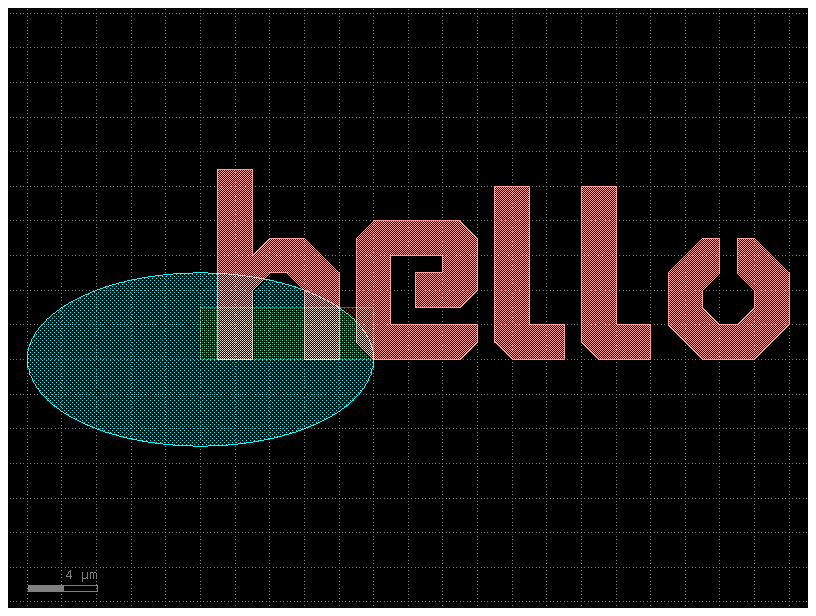

In [71]:
import gdsfactory as gf

# Start with a blank Component
c = gf.Component()

# Create some more Components with shapes
T = gf.components.text("hello", size=10, layer=(1, 0))
E = gf.components.ellipse(radii=(10, 5), layer=(2, 0))
R = gf.components.rectangle(size=(10, 3), layer=(3, 0))

# Add the shapes to c as references
text = c << T
ellipse = c << E
rect1 = c << R
rect2 = c << R

c.plot()

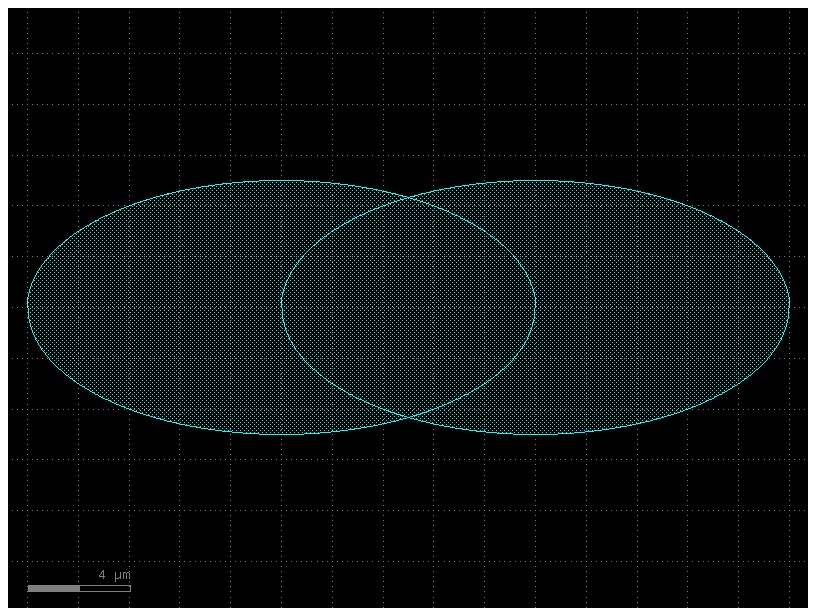

In [72]:
c = gf.Component()
e1 = c << gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e2 = c << gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e1.dmovex(10)
c.plot()

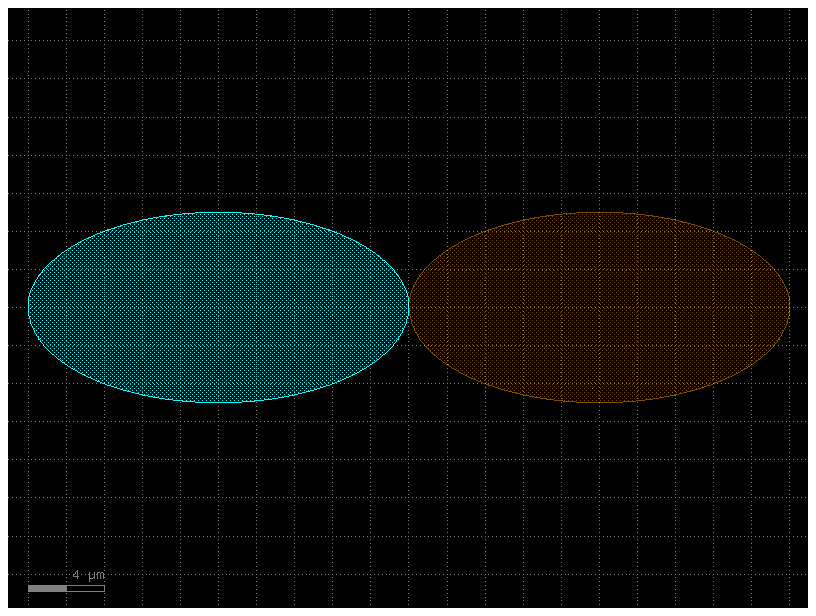

In [74]:
c = gf.Component()
e1 = c << gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e2 = c << gf.components.ellipse(radii=(10, 5), layer=(3, 0))
e2.dxmin = e1.dxmax
c.plot()

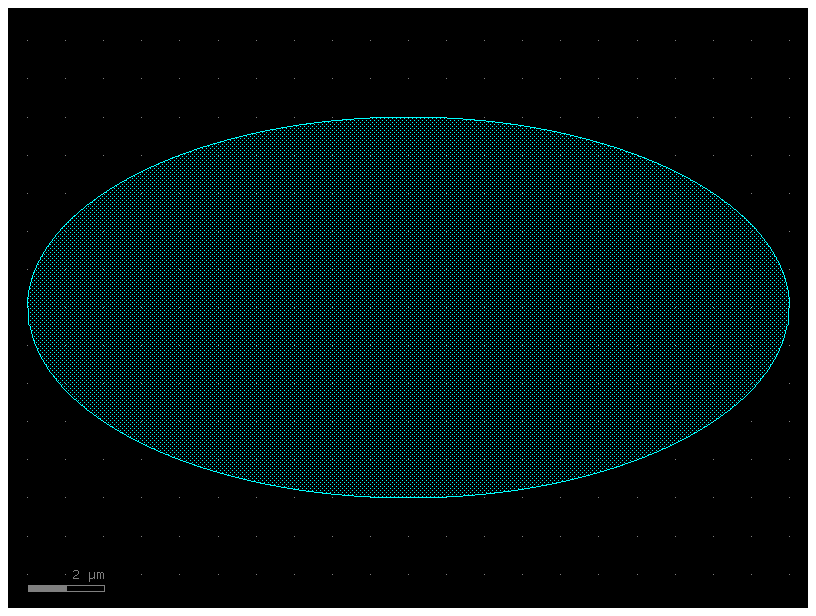

In [75]:
# Now you can practice move and rotate the objects.

c = gf.Component()
E = gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e1 = c << E
e2 = c << E
c.plot()

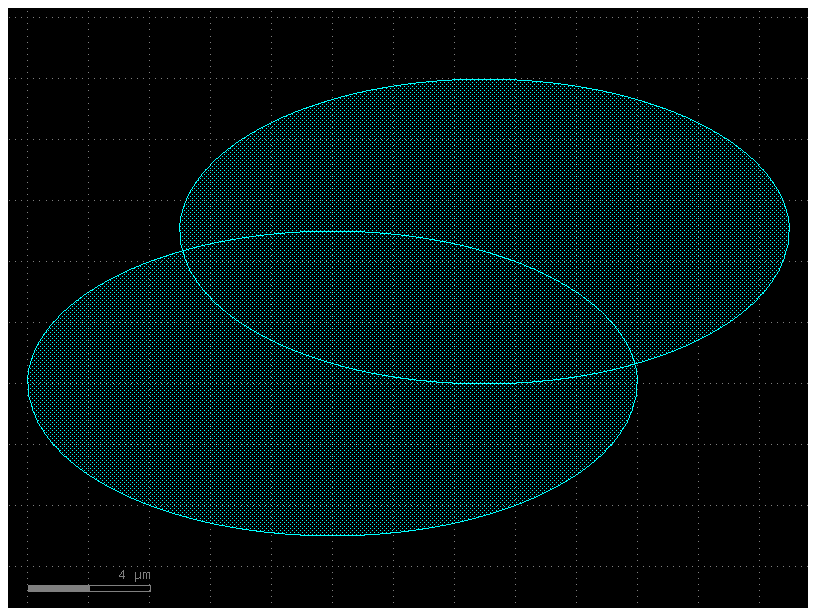

In [76]:
c = gf.Component()
e = gf.components.ellipse(radii=(10, 5), layer=(2, 0))
e1 = c << e
e2 = c << e
e2.dmove((5, 5))  # Translate by dx = 5, dy = 5
c.plot()

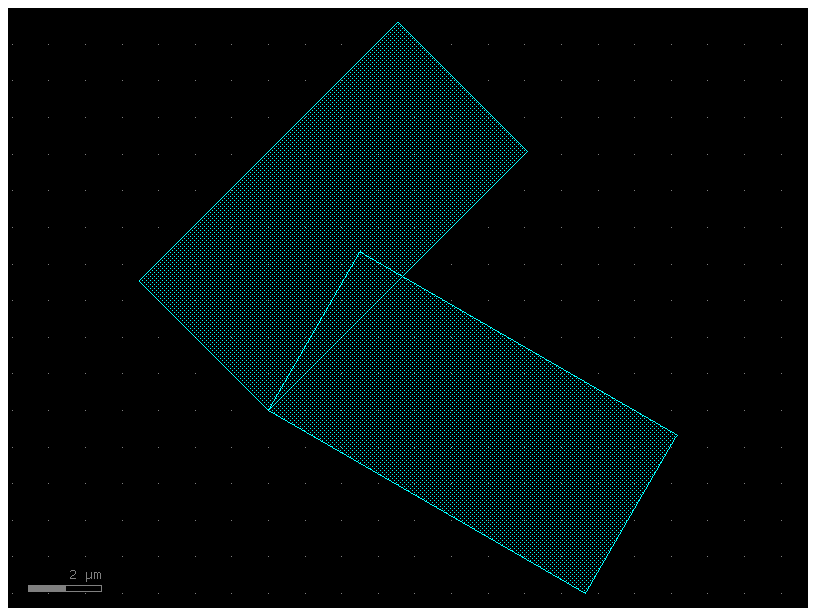

In [77]:
c = gf.Component()
r = gf.components.rectangle(size=(10, 5), layer=(2, 0))
rect1 = c << r
rect2 = c << r

rect1.drotate(45)  # Rotate the first straight by 45 degrees around (0,0)
rect2.drotate(-30)  # Rotate the second straight by -30 degrees around (1,1)
c.plot()

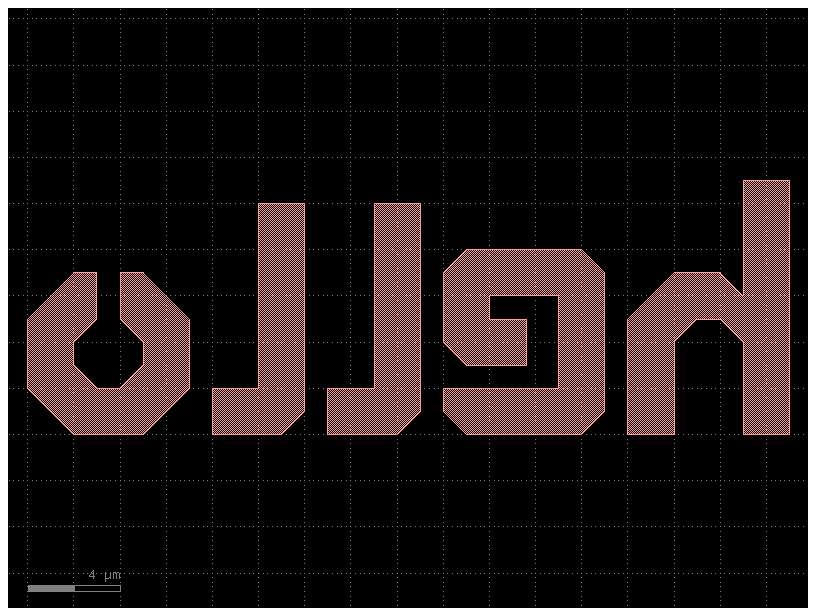

In [78]:
import gdsfactory as gf

c = gf.Component()
text = c << gf.components.text("hello")
text.dmirror(
    p1=gf.kdb.Point(1, 1), p2=gf.kdb.Point(1, 3)
)  # Reflects across the line formed by p1 and p2
c.plot()

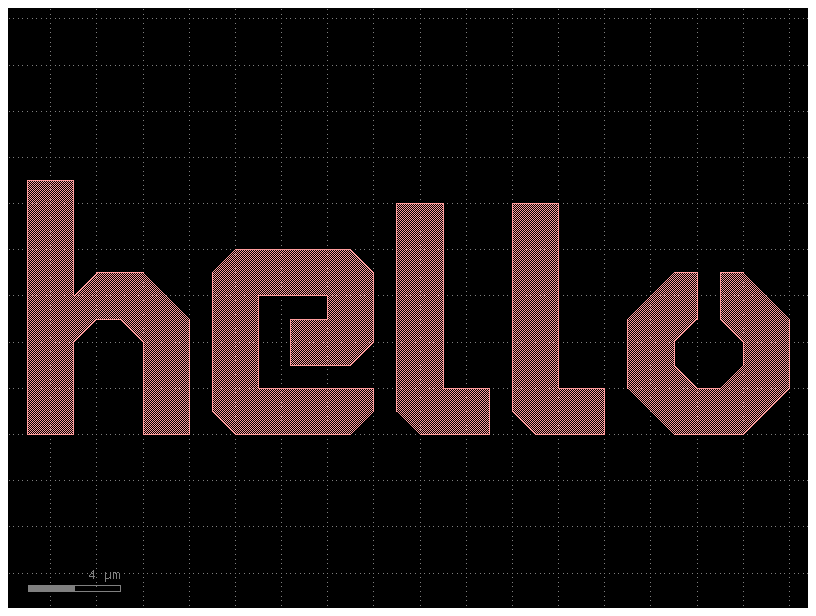

In [79]:
c = gf.Component()
text = c << gf.components.text("hello")
c.plot()

Each Component and ComponentReference object has several properties which can be
used
to learn information about the object (for instance where it's center coordinate
is).  Several of these properties can actually be used to move the geometry by
assigning them new values.

Available properties are:

- `xmin` / `xmax`: minimum and maximum x-values of all points within the object
- `ymin` / `ymax`: minimum and maximum y-values of all points within the object
- `x`: centerpoint between minimum and maximum x-values of all points within the
object
- `y`: centerpoint between minimum and maximum y-values of all points within the
object
- `bbox`: bounding box (see note below) in format ((xmin,ymin),(xmax,ymax))
- `center`: center of bounding box

In [80]:
print(
    "printing the bounding box of text in terms of [(xmin, ymin), (xmax, ymax)] in um"
)
print(text.dbbox())  # in Decimal um (float)
print("xsize and ysize:")
print(text.dxsize)  # Will print the width of text in the x dimension in um
print(text.dysize)  # Will print the height of text in the y dimension in um

print("center:")
print(text.dcenter)  # Gives you the center coordinate of its bounding box in DBU
print("xmax")
print(text.dxmax)  # Gives you the rightmost (+x) edge of the text bounding box

printing the bounding box of text in terms of [(xmin, ymin), (xmax, ymax)] in um
(1,0;34,11)
xsize and ysize:
33.0
11.0
center:
17.5,5.5
xmax
34.0


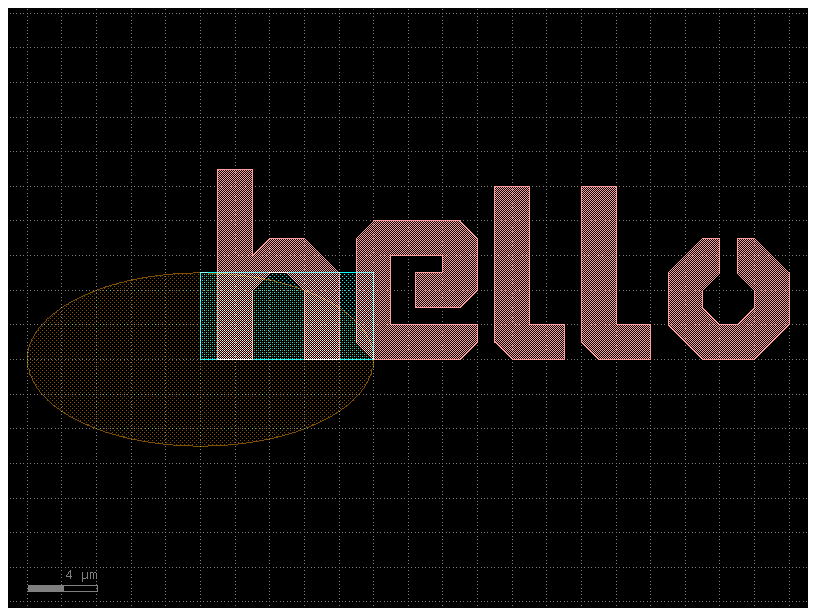

In [81]:
c = gf.Component()
text = c << gf.components.text("hello")
E = gf.components.ellipse(radii=(10, 5), layer=(3, 0))
R = gf.components.rectangle(size=(10, 5), layer=(2, 0))
rect1 = c << R
rect2 = c << R
ellipse = c << E
c.plot()

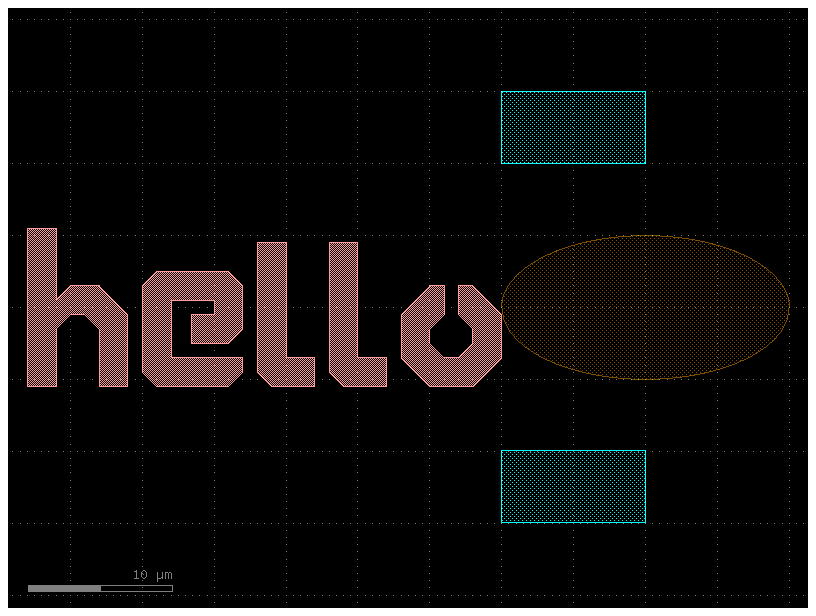

In [82]:
ellipse.dcenter = [
    0,
    0,
]  # Move the ellipse such that the bounding box center is at (0,0)

# Next, let's move the text to the left edge of the ellipse
text.dy = (
    ellipse.dy
)  # Move the text so that its y-center is equal to the y-center of the ellipse
text.dxmax = ellipse.dxmin  # Moves the ellipse so its xmax == the ellipse's xmin

# Align the right edge of the rectangles with the x=0 axis
rect1.dxmax = 0
rect2.dxmax = 0

# Move the rectangles above and below the ellipse
rect1.dymin = ellipse.dymax + 5
rect2.dymax = ellipse.dymin - 5

c.plot()

In [83]:
import gdsfactory as gf

2024-07-26 21:01:33.423 | WARNING  | gdsfactory.component:__getattribute__:126 - Getting `text_Thi_S10_P0_0_Jleft_LWG_6000_5500.x` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `text_Thi_S10_P0_0_Jleft_LWG_6000_5500.dx` instead. For further information, please consult the migration guide https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-07-26 21:01:33.426 | WARNING  | gdsfactory.component:__getattribute__:126 - Getting `text_Thi_S10_P0_0_Jleft_LWG_6000_5500.y` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `text_Thi_S10_P0_0_Jleft_LWG_6000_5500.dy` instead. For further information, please consult the migration guide https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-07-26 21:01:33.428 | WARNING  | gdsfactory.component:__getattribute__:126 - Getting `text_Thi_S10_P0_0_Jleft_LWG_6000_5500.x` in um is deprecated and will change to DataBaseUnits in gdsfactory9

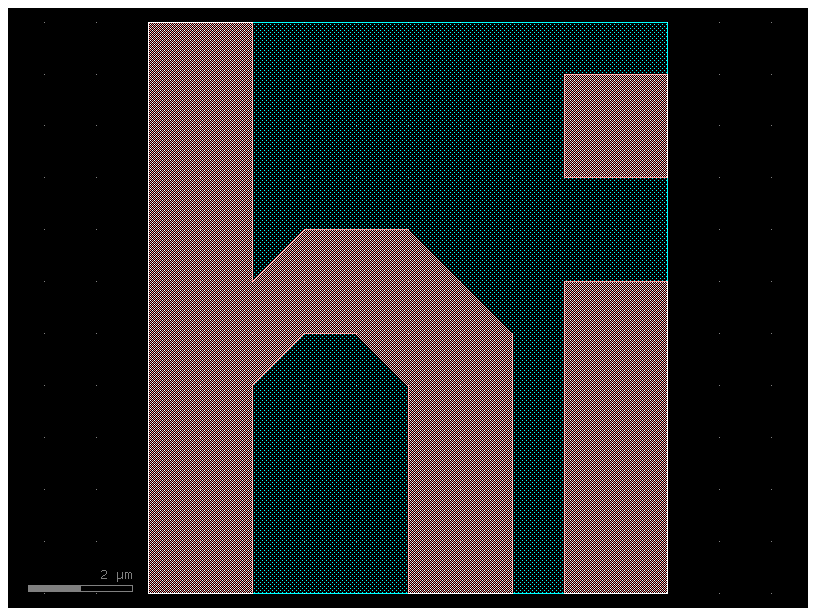

In [84]:
# A bounding box is the smallest enclosing box which contains all points of the geometry.

c = gf.Component()
text = c << gf.components.text("hi")
c << gf.components.bbox(text, layer=(2, 0))
fig = c.plot()

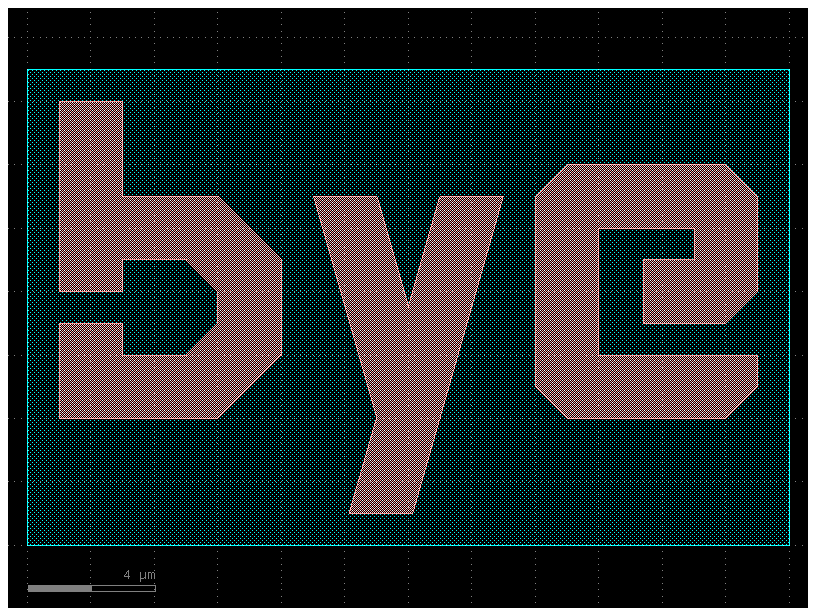

In [85]:
c = gf.Component()
text = c << gf.components.text("bye")
device_bbox = text.bbox
c.add_polygon(gf.get_padding_points(text, default=1), layer=(2, 0))
c.plot()

In [86]:
# When we query the properties of c, they will be calculated with respect to this bounding-rectangle.  For instance:

print("Center of Component c:")
print(c.dcenter)

print("X-max of Component c:")
print(c.dxmax)

Center of Component c:
12,3.5
X-max of Component c:
24.0


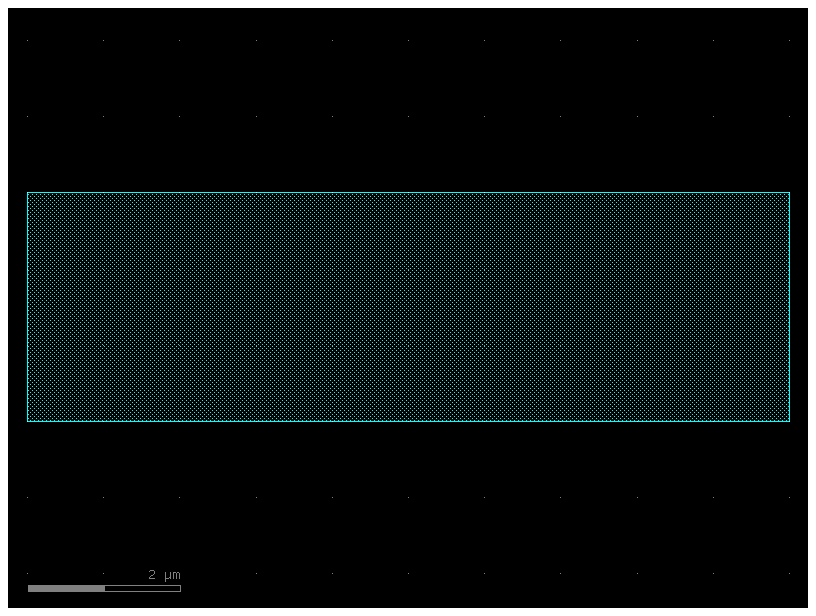

In [93]:
c = gf.Component()
R = gf.components.rectangle(size=(10, 3), layer=(2, 0))
rect1 = c << R
f = c.plot()

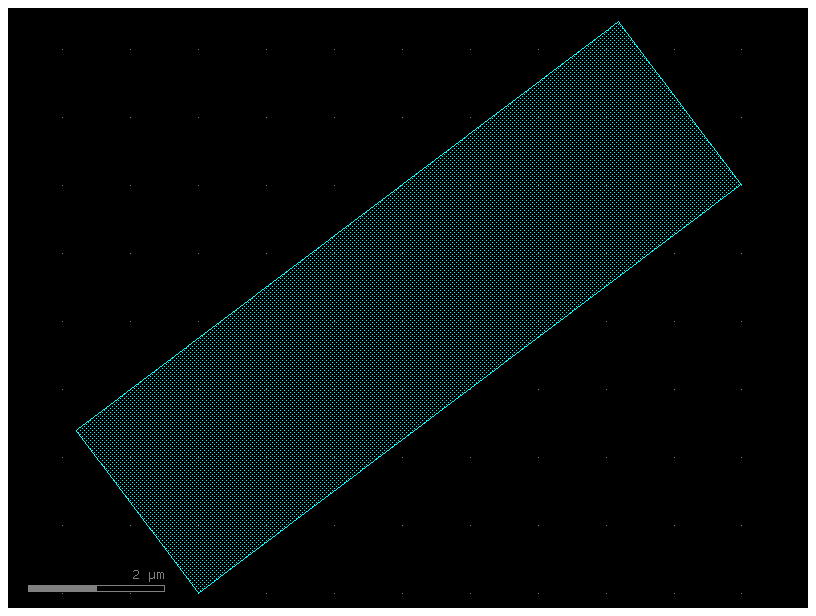

In [88]:
# You can chain many of the movement/manipulation functions because they all return the object they manipulate.
# For instance you can combine two expressions:

rect1.drotate(angle=37)
rect1.dmove([10, 20])
f = c.plot()

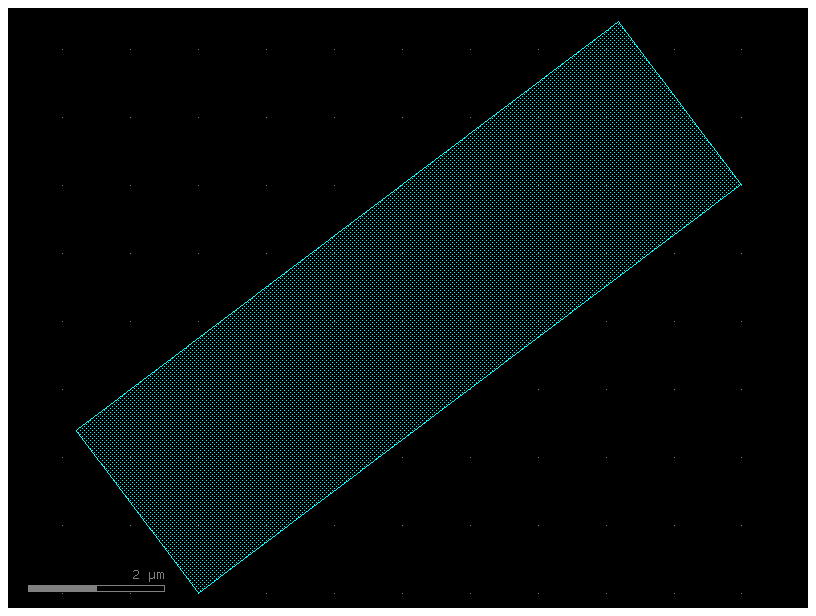

In [89]:
# ...into this single-line expression

c = gf.Component()
R = gf.components.rectangle(size=(10, 3), layer=(2, 0))
rect1 = c << R
rect1.drotate(angle=37).dmove([10, 20])
f = c.plot()